In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import keras
import pandas as pd
import matplotlib.pyplot as plt

2024-03-11 22:30:02.589620: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-11 22:30:03.599494: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
housing = fetch_california_housing()


X_train_full,X_test,y_train_full,y_test=train_test_split(housing.data,housing.target)
X_train,X_val,y_train,y_val=train_test_split(X_train_full,y_train_full)


scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_val=scaler.transform(X_val)
X_test=scaler.transform(X_test)

In [5]:
print(X_train.shape)

(11610, 8)


In [11]:
model=keras.models.Sequential([
    keras.layers.Dense(30,activation='relu',input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error",optimizer="sgd")
history=model.fit(X_train,y_train,epochs=20,validation_data=(X_val,y_val))
mse_test=model.evaluate(X_test,y_test)


Epoch 1/20


/home/adi_techbuddy/Desktop/models_ml/ModelForge/.venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.0023 - val_loss: 0.4816
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4422 - val_loss: 0.6567
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4387 - val_loss: 0.5201
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3932 - val_loss: 1.3667
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step - loss: 0.4297 - val_loss: 0.3956
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3885 - val_loss: 1.6859
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step - loss: 0.4158 - val_loss: 4.0076
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3730 - val_loss: 1.0602
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3987 - val_loss: 1.4994
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3882 - val_loss: 0.6116
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - loss: 0.3879 - val_loss: 0.5251
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - lo

In [16]:
print(mse_test)

0.3579919636249542


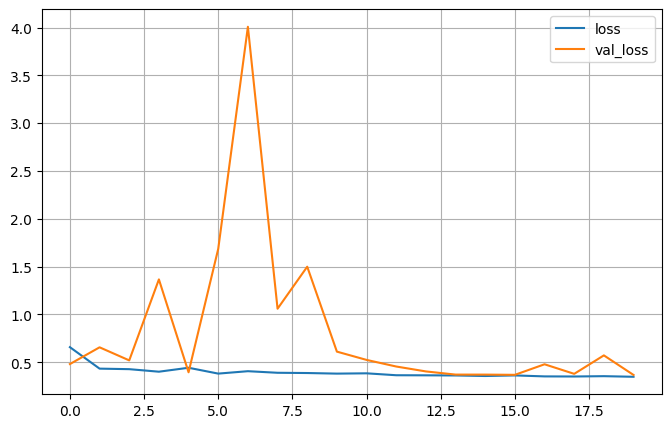

In [17]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca()
plt.show()

In [13]:
X_new=X_test[:3]
y_pred=model.predict(X_new)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


In [14]:
print(y_test[:3])
print(y_pred)

[3.459   1.384   5.00001]
[[3.172322  ]
 [0.76925457]
 [5.7924514 ]]
